In [2]:
import gymnasium as gym
env = gym.make("LunarLander-v2")
observation, _ = env.reset()

print(observation)
print(env.action_space)

fitness = 0.0
terminated = False
truncated = False
while not (terminated or truncated):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    #print(env.action_space.sample())
    print(observation[6], observation[7])
    #print(terminated, truncated)
    #print(reward)
    fitness += reward

print(fitness)

[-0.00398607  1.4125063  -0.40375748  0.07049739  0.0046256   0.09145711
  0.          0.        ]
Discrete(4)
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
1.0 1.0
-107.81617551522926



 ****** Running generation 0 ****** 



/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Population's average fitness: -442.92413 stdev: 223.65377
Best fitness: -35.26870 - size: (4, 16) - species 5 - id 57
Average adjusted fitness: 0.577
Mean genetic distance 2.916, standard deviation 0.552
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    35    -76.8    0.532     0
     2    0    30   -110.5    0.621     0
     3    0    17   -144.7    0.541     0
     4    0    13   -167.7    0.490     0
     5    0    23    -35.3    0.621     0
     6    0    32   -257.8    0.658     0
Total extinctions: 0
Generation time: 8.917 sec

 ****** Running generation 1 ****** 

Population's average fitness: -300.03863 stdev: 239.10444
Best fitness: -43.12606 - size: (4, 16) - species 1 - id 111
Average adjusted fitness: 0.832
Mean genetic distance 2.873, standard deviation 0.678
Population of 151 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    

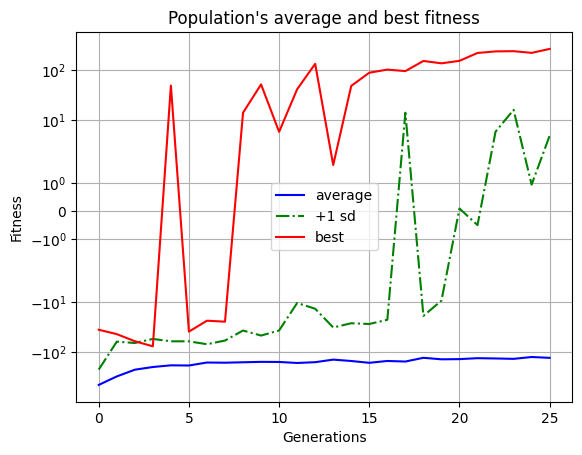

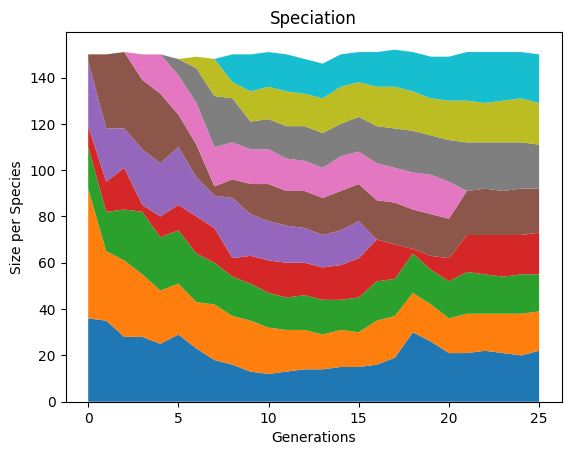

In [31]:
import multiprocessing
import os
import pickle

import cart_pole
import neat
import visualize
import gym
import numpy as np

runs_per_net = 5

def eval_genome(genome, config):
    net = neat.nn.FeedForwardNetwork.create(genome, config)

    fitnesses = []

    for runs in range(runs_per_net):
        env = gym.make("LunarLander-v2")

        observation, _ = env.reset()
        fitness = 0.0
        terminated = False
        truncated = False
        while not (terminated or truncated):
            
            action = net.activate(observation)
            action =  action.index(max(action))
            observation, reward, terminated, truncated, info = env.step(action)
            fitness += reward

        fitnesses.append(fitness)

    return np.mean(fitnesses)

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = eval_genome(genome, config)


def run():
    # Load the config file, which is assumed to live in
    # the same directory as this script.

    local_dir = os.path.dirname('__file__')
    config_path = os.path.join(local_dir, 'LunarLander_config10')
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_path)
    
    pop = neat.Population(config)
    stats = neat.StatisticsReporter()
    pop.add_reporter(stats)
    pop.add_reporter(neat.StdOutReporter(True))

    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)

    best_genome = None
    best_fitness = float('-inf')
    
    def update_best_genome(genomes, config):
        nonlocal best_genome, best_fitness
        eval_genomes(genomes, config)
        for _, genome in genomes:
            if genome.fitness > best_fitness:
                best_fitness = genome.fitness
                best_genome = genome
    
    
    #winner = pop.run(pe.evaluate, 250)
    pop.run(update_best_genome, 350)

    # Save the best genome found during evolution
    if best_genome is not None:
        with open('winner-LunarLander10', 'wb') as f:
            pickle.dump(best_genome, f)
    
        print(best_genome)
    
        node_names = {-1: 'X position', -2: 'Y position', -3: 'linear velocity X', -4: 'linear velocity Y', -5: 'angle', -6: 'angular velocity', -7: 'left leg ground contact', -8: 'right leg ground contact', 
                      0: 'do nothing', 1: 'fire left orientation engine', 2: 'fire main engine', 3: 'fire right orientation engine'}
        visualize.plot_stats(stats, ylog=True, view=True, filename="LunarLander-fitness10.svg")
        visualize.plot_species(stats, view=True, filename="LunarLander-speciation10.svg")
    
        visualize.draw_net(config, best_genome, True, node_names=node_names)
        visualize.draw_net(config, best_genome, view=True, node_names=node_names, filename="winner-LunarLander10.gv")

if __name__ == '__main__':
    run()

In [9]:
import os
import pickle
import neat
import gym 
import numpy as np
from gym.wrappers.record_video import RecordVideo

# load the winner
with open('winner-LunarLander10', 'rb') as f:
    c = pickle.load(f)

print('Loaded genome:')
print(c)

local_dir = os.path.dirname('__file__')
config_path = os.path.join(local_dir, 'LunarLander_config10')
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

net = neat.nn.FeedForwardNetwork.create(c, config)


env = gym.make("LunarLander-v2", render_mode="rgb_array")
env = RecordVideo(env, './video',  episode_trigger=lambda x: x % 2 == 0)
observation, _ = env.reset()

env.start_video_recorder()
terminated = False
truncated = False
while not (terminated or truncated):
    action = net.activate(observation)
    action =  np.argmax(action)
    observation, reward, terminated, truncated, info = env.step(action)
    #env.render()


env.close_video_recorder()

env.close()

Loaded genome:
Key: 3333
Fitness: 265.82873880389377
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.1536826322502984, response=0.9937880436827269, activation=tanh, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=0.20901249908005798, response=0.9934617831568092, activation=tanh, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=-0.8559282740364813, response=0.9981166906732242, activation=tanh, aggregation=sum)
	3 DefaultNodeGene(key=3, bias=-0.33513915611189116, response=0.9898148425787618, activation=tanh, aggregation=sum)
	294 DefaultNodeGene(key=294, bias=0.4478892684649254, response=1.0085504994644623, activation=tanh, aggregation=sum)
	360 DefaultNodeGene(key=360, bias=0.25291039270300264, response=1.0, activation=tanh, aggregation=sum)
	388 DefaultNodeGene(key=388, bias=0.5466745779916822, response=1.0, activation=tanh, aggregation=sum)
	433 DefaultNodeGene(key=433, bias=0.4197164258467919, response=1.0, activation=tanh, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-8, 1), we

Moviepy - Done !
Moviepy - video ready /home/pmedur/strojnoUcenje/env/bin/NEAT-project/video/rl-video-episode-0.mp4


Moviepy - Building video /home/pmedur/strojnoUcenje/env/bin/NEAT-project/video/rl-video-episode-0.mp4.
Moviepy - Writing video /home/pmedur/strojnoUcenje/env/bin/NEAT-project/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/pmedur/strojnoUcenje/env/bin/NEAT-project/video/rl-video-episode-0.mp4
